In [1]:
# Overview of all RT
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)


import matplotlib.pyplot as plt
#%matplotlib widget
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "Dark2"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)
#%matplotlib widget
# plt.style.use('ggplot')
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))
from matplotlib import cm # Colormaps

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax = plt.gca()
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y \n %B'))

import os
# import csv
import math


from datetime import date


saveFigures = True
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]


saveFigures is set to: True
Done loading packages


In [2]:
allFiles = os.listdir('Rt/')

In [3]:
df = pd.read_csv('Rt/Rt_cases_2020_07_08.csv',delimiter=';')

df["date_sample"] = df["date_sample"].astype('datetime64[D]')
df['estimate'] = pd.to_numeric(df["estimate"].astype(str).apply(lambda x: x.replace(',','.')))
df['uncertainty_lower'] = pd.to_numeric(df["uncertainty_lower"].astype(str).apply(lambda x: x.replace(',','.')))
df['uncertainty_upper'] = pd.to_numeric(df["uncertainty_upper"].astype(str).apply(lambda x: x.replace(',','.')))

In [11]:
testdf = pd.read_csv('Rt/'+allFiles[-1],delimiter=';')
testdf.tail()

,SampleDate,estimate,uncertainty_lower,uncertainty_upper
418,2021-05-18,"1,1","0,9","1,3"
419,2021-05-19,"1,1","0,9","1,3"
420,2021-05-20,"1,1","0,9","1,3"
421,2021-05-21,"1,1","0,9","1,3"
422,2021-05-22,"1,1","0,9","1,3"


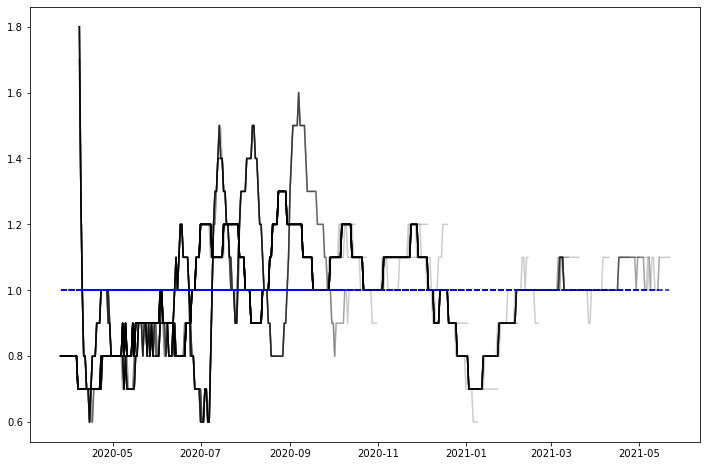

In [4]:
plt.figure()

for curFile in allFiles:
    # print(curFile)
    df = pd.read_csv('Rt/'+curFile,delimiter=';')

    if (df.columns[0] == 'date_sample'):
        df["date_sample"] = df["date_sample"].astype('datetime64[D]')
        curDates = df.date_sample
    else:
        df["SampleDate"] = df["SampleDate"].astype('datetime64[D]')
        curDates = df.SampleDate
    df['estimate'] = pd.to_numeric(df["estimate"].astype(str).apply(lambda x: x.replace(',','.')))
    df['uncertainty_lower'] = pd.to_numeric(df["uncertainty_lower"].astype(str).apply(lambda x: x.replace(',','.')))
    df['uncertainty_upper'] = pd.to_numeric(df["uncertainty_upper"].astype(str).apply(lambda x: x.replace(',','.')))
    
    plt.plot(curDates,np.ones(curDates.shape),'b--')
    plt.plot(curDates,df.estimate,color=[0,0,0,0.2])
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


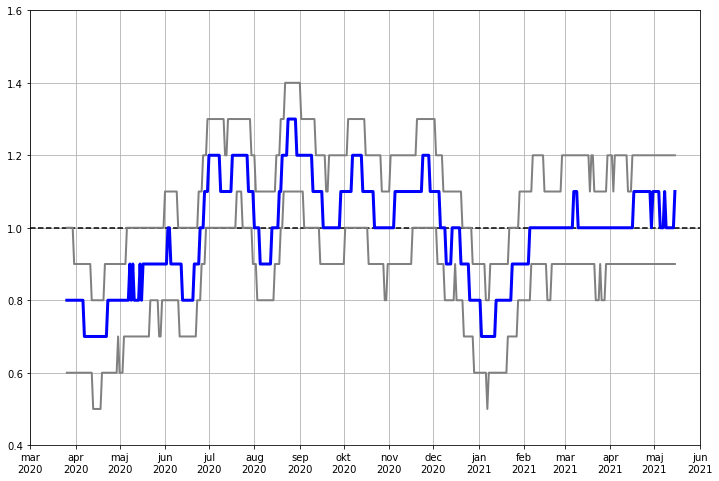

In [5]:
# import numpy as np
# from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
# plt.style.use('seaborn-pastel')

# for curFile in allFiles:
#     # print(curFile)
    

fig = plt.figure()
# ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
firstDate = np.datetime64('2020-03-01')
today = date.today()
curTicks = np.arange(np.datetime64('2020-03'),np.datetime64('2021-12'))

ax = plt.axes(xlim=(firstDate,today),ylim=(0.4,1.6))
ax.set_xticks(curTicks)
ax.plot([firstDate,today],[1,1],'k--')

ax.set_xlim([firstDate,today])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.grid()

line, = ax.plot([], [],color='b', lw=3)
line2, = ax.plot([], [],color='grey', lw=2)
line3, = ax.plot([], [],color='grey', lw=2)

def init():
    line.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    # line.set_data(x, y)

    df = pd.read_csv('Rt/'+allFiles[i],delimiter=';')

    if (df.columns[0] == 'date_sample'):
        df["date_sample"] = df["date_sample"].astype('datetime64[D]')
        curDates = df.date_sample
    else:
        df["SampleDate"] = df["SampleDate"].astype('datetime64[D]')
        curDates = df.SampleDate
    df['estimate'] = pd.to_numeric(df["estimate"].astype(str).apply(lambda x: x.replace(',','.')))
    df['uncertainty_lower'] = pd.to_numeric(df["uncertainty_lower"].astype(str).apply(lambda x: x.replace(',','.')))
    df['uncertainty_upper'] = pd.to_numeric(df["uncertainty_upper"].astype(str).apply(lambda x: x.replace(',','.')))
    

    line.set_data(curDates,df.estimate)
    line2.set_data(curDates,df.uncertainty_upper)
    line3.set_data(curDates,df.uncertainty_lower)
    # line.set_data(x,y)
    # plt.plot(curDates,np.ones(curDates.shape),'b--')
    # plt.plot(curDates,df.estimate,color=[0,0,0,0.2])


    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=len(allFiles)-1, interval=500, blit=True)


anim.save('figs/RtAnimation.gif', writer='ffmpeg')

In [6]:
plt.close('all')
# line

In [7]:
df.tail()

,SampleDate,estimate,uncertainty_lower,uncertainty_upper
418,2021-05-18,1.1,0.9,1.3
419,2021-05-19,1.1,0.9,1.3
420,2021-05-20,1.1,0.9,1.3
421,2021-05-21,1.1,0.9,1.3
422,2021-05-22,1.1,0.9,1.3


In [8]:
df

,SampleDate,estimate,uncertainty_lower,uncertainty_upper
0,2020-03-26,0.8,0.6,1.0
1,2020-03-27,0.8,0.6,1.0
2,2020-03-28,0.8,0.6,1.0
3,2020-03-29,0.8,0.6,1.0
4,2020-03-30,0.8,0.6,1.0
5,2020-03-31,0.8,0.6,0.9
6,2020-04-01,0.8,0.6,0.9
7,2020-04-02,0.8,0.6,0.9
8,2020-04-03,0.8,0.6,0.9
9,2020-04-04,0.8,0.6,0.9
